In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Import data and split it

In [2]:
df=pd.read_csv(r'S:\Portfolio\Extra_Learning\Data_Science_practice\DL\Iris-classification-using-PyTorch-main\iris.data.csv')

In [3]:
df.head(3)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
le = LabelEncoder()
df['Iris-setosa'] = le.fit_transform(df['Iris-setosa'])

In [5]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [6]:
features=df.drop('Iris-setosa',axis=1).values

In [7]:
label=df['Iris-setosa'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=33)

In [9]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [10]:
X_train[:5]

tensor([[5.7000, 3.0000, 4.2000, 1.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.9000, 3.1000, 5.1000, 2.3000]])

#### Build the class and instantiate it

In [11]:
class Model(nn.Module):
    def __init__(self,input_features=4,h1=8, h2=9,output=3):
        super().__init__()
        self.l1=nn.Linear(input_features,h1)
        self.l2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,output)
        
    def forward(self,X):
        X=F.relu(self.l1(X))
        X=F.relu(self.l2(X))
        X=self.out(X)
        return X

In [12]:
torch.manual_seed(41)
# model=Model(4,8,9,3)
model=Model()

In [13]:
criterion = nn.CrossEntropyLoss()

In [14]:
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

C:\Users\DELL\anaconda3\Lib\site-packages\onnxruntime\capi\_pybind_state.py:26: UserWarning: Please install the 2019 Visual C++ runtime and then try again. If you've installed the runtime in a non-standard location (other than %SystemRoot%\System32), make sure it can be found by setting the correct path.
  warnings.warn("Please install the 2019 Visual C++ runtime and then try again. "


In [15]:
model.parameters

<bound method Module.parameters of Model(
  (l1): Linear(in_features=4, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

#### Training the data

In [16]:
epochs=100
losses=[]

In [17]:
%timeit 
for e in range(epochs):
    y_pred=model.forward(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    if e%10==0:
        print('For epoch {}, the loss is {}'.format(e,loss))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

For epoch 0, the loss is 1.1258212327957153
For epoch 10, the loss is 1.0227776765823364
For epoch 20, the loss is 0.8454235792160034
For epoch 30, the loss is 0.6057517528533936
For epoch 40, the loss is 0.41028502583503723
For epoch 50, the loss is 0.2766762375831604
For epoch 60, the loss is 0.1862855702638626
For epoch 70, the loss is 0.12983867526054382
For epoch 80, the loss is 0.09495951980352402
For epoch 90, the loss is 0.07528500258922577


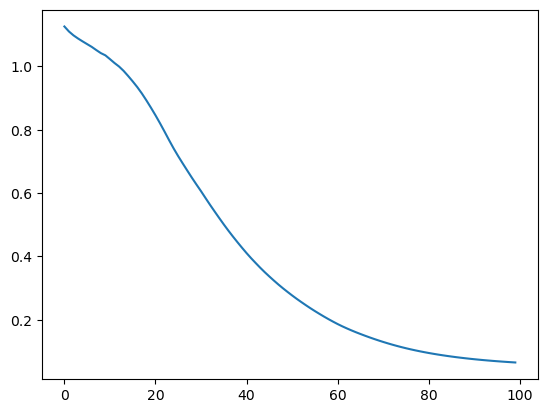

In [18]:
plt.plot(range(epochs),losses)

In [19]:
with torch.no_grad():
    y_test_pred=model.forward(X_test)
    loss=criterion(y_test_pred,y_test)
    print(loss)

tensor(0.1088)


In [27]:
correct_pred=0
for i in range(len(y_test)):
    print('{} \t {} \t {}'.format(i+1,y_test_pred[i].argmax().item(),y_test[i]))
    if y_test_pred[i].argmax().item()==y_test[i]:
        correct_pred+=1
print('You have got {} correct which is {} % correct'.format(correct, correct*100/len(y_test)))
print(y_test_pred[16])

1 	 1 	 1
2 	 1 	 1
3 	 0 	 0
4 	 1 	 1
5 	 2 	 2
6 	 2 	 2
7 	 0 	 0
8 	 0 	 0
9 	 2 	 2
10 	 2 	 2
11 	 2 	 2
12 	 0 	 0
13 	 2 	 2
14 	 1 	 1
15 	 2 	 2
16 	 1 	 1
17 	 2 	 2
18 	 0 	 0
19 	 1 	 1
20 	 2 	 2
21 	 0 	 0
22 	 0 	 0
23 	 2 	 2
24 	 0 	 0
25 	 2 	 2
26 	 2 	 2
27 	 1 	 1
28 	 1 	 1
29 	 2 	 2
30 	 2 	 2
You have got 30 correct which is 100.0 % correct
tensor([-6.8917,  5.0788,  7.2106])


In [24]:
which_iris=torch.tensor([5.6,3.7,2.2,0.5])

In [25]:
y_pred=model(which_iris)
print(y_pred)
print('The correct class is {}'.format(y_pred.argmax().item()))

tensor([ 3.4835, -1.0465, -2.3608], grad_fn=<ViewBackward0>)
The correct class is 0


In [26]:
y_pred = model(mystery_iris)
print(y_pred)

predicted_class_index = y_pred.argmax()
predicted_class_label = le.inverse_transform([predicted_class_index])

print('The predicted class is {}'.format(predicted_class_label[0]))

tensor([ 3.4835, -1.0465, -2.3608], grad_fn=<ViewBackward0>)
The predicted class is Iris-setosa
